Lesson 9 - Introduction to Python - Datetime and Other Pandas Tricks and Techniques

## Review of setting up a Pandas dataframe using a dictionary of lists. 

<p>Here is a picture of a pizza delivery driver who was angry with his schedule so he killed a fellow employee. (You can see the yellow crime-scene tape below).  The lesson is: <b>Make sure that the delivery drivers are happy with their schedules!</b></p>
<p>Let's assume we have a pizza delivery company with five drivers, and each driver has hours booked on a schedule for each day of the week. We can build a list of hours for each day, a list of pizza delivery drivers, put those lists into a dictionary and use that dictionary to build a dataframe. From that we can make some adjustments to the delivery driver schedule and ensure everyone is happy.</p>

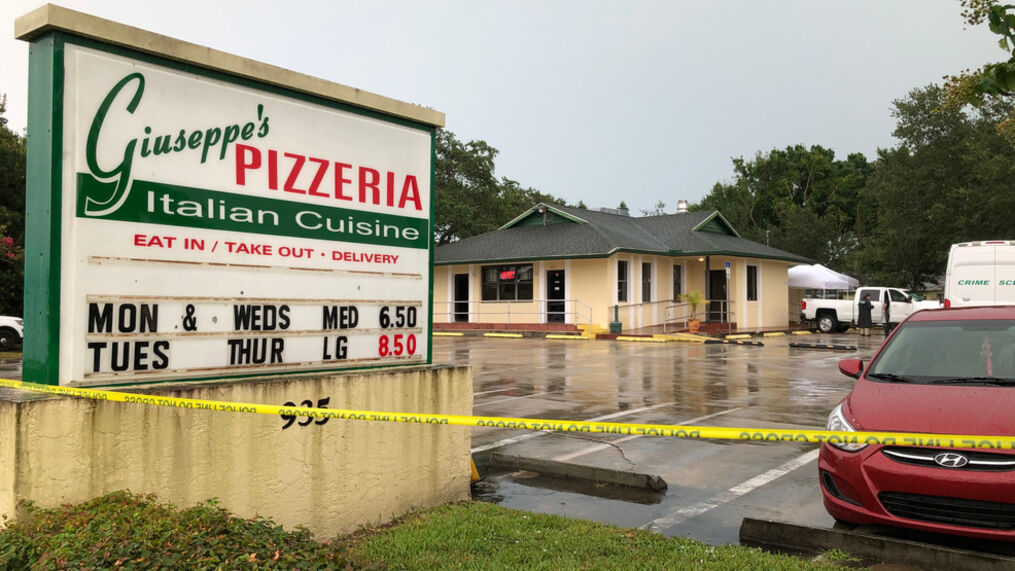

### Lists

In [1]:
pizza_drivers = ['Evgeniya', 'Stephen', 'Ben', 'Aaron']

mon_hours = [0, 4, 4, 4]
tue_hours = [0, 1, 3, 5]
wed_hours = [4, 4, 4, 0]
thu_hours = [4, 0, 4, 4]
fri_hours = [4, 4, 4, 4]
sat_hours = [5, 3, 2, 1]
sun_hours = [3, 2, 1, 7]


In [2]:
print(pizza_drivers)
print(mon_hours)
print(tue_hours)
print(wed_hours)
print(thu_hours)
print(fri_hours)
print(sat_hours)
print(sun_hours)

['Evgeniya', 'Stephen', 'Ben', 'Aaron']
[0, 4, 4, 4]
[0, 1, 3, 5]
[4, 4, 4, 0]
[4, 0, 4, 4]
[4, 4, 4, 4]
[5, 3, 2, 1]
[3, 2, 1, 7]


### Dictionary of Lists

In [3]:
work_schedule = {
    'pizza_driver': pizza_drivers,
    '4/19/2021': mon_hours, 
    '4/20/2021': tue_hours,
    '4/21/2021': wed_hours,
    '4/22/2021': thu_hours, 
    '4/23/2021': fri_hours,
    '4/24/2021': sat_hours,
    '4/25/2021': sun_hours
}

In [4]:
work_schedule

{'pizza_driver': ['Evgeniya', 'Stephen', 'Ben', 'Aaron'],
 '4/19/2021': [0, 4, 4, 4],
 '4/20/2021': [0, 1, 3, 5],
 '4/21/2021': [4, 4, 4, 0],
 '4/22/2021': [4, 0, 4, 4],
 '4/23/2021': [4, 4, 4, 4],
 '4/24/2021': [5, 3, 2, 1],
 '4/25/2021': [3, 2, 1, 7]}

Dataframe of a dictionary

In [5]:
import pandas as pd

In [6]:
# create a dataframe from a dictionary

df = pd.DataFrame(work_schedule)

In [7]:
# display the dataframe
hours = df.copy()
display(hours.head())

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
0,Evgeniya,0,0,4,4,4,5,3
1,Stephen,4,1,4,0,4,3,2
2,Ben,4,3,4,4,4,2,1
3,Aaron,4,5,0,4,4,1,7


# Exercise - What are the index values in the dataframe above?

In [8]:
###
###
###
###
###
###
###
###
###

### Setting the index to the pizza delivery driver

In [9]:
hours = df.copy()
hours = hours.set_index('pizza_driver')
hours.head()

,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
pizza_driver,,,,,,,
Evgeniya,0,0,4,4,4,5,3
Stephen,4,1,4,0,4,3,2
Ben,4,3,4,4,4,2,1
Aaron,4,5,0,4,4,1,7


## Using df.head() to only look at the first 2 rows

In [10]:
hours.head(2)

,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
pizza_driver,,,,,,,
Evgeniya,0,0,4,4,4,5,3
Stephen,4,1,4,0,4,3,2


## Using the df.info() to look at the column types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pizza_driver  4 non-null      object
 1   4/19/2021     4 non-null      int64 
 2   4/20/2021     4 non-null      int64 
 3   4/21/2021     4 non-null      int64 
 4   4/22/2021     4 non-null      int64 
 5   4/23/2021     4 non-null      int64 
 6   4/24/2021     4 non-null      int64 
 7   4/25/2021     4 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 384.0+ bytes


# Now that we have a dataframe with a our pizza delivery schedule, let's look at a few techniques we can use to create a sum total of all the hours for each employee. 

In [12]:
hours = df.copy()
hours

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
0,Evgeniya,0,0,4,4,4,5,3
1,Stephen,4,1,4,0,4,3,2
2,Ben,4,3,4,4,4,2,1
3,Aaron,4,5,0,4,4,1,7


### Method 1 - Add up all the columns individually (this is a bit cumberson)

In [13]:
hours['employee_total'] = hours['4/19/2021'] + hours['4/20/2021'] + hours['4/21/2021'] + hours['4/23/2021'] + hours['4/24/2021'] + hours['4/25/2021']
                          

### Using paranthesis allows you to line them up and make them easier to see on the screen. 

In [14]:
# NOTE - you don't need the parenthesis befor and after the column addition...

hours['employee_total'] = (hours['4/19/2021']
                           + hours['4/20/2021']
                           + hours['4/21/2021']
                           + hours['4/22/2021']
                           + hours['4/23/2021']
                           + hours['4/24/2021']
                          )
hours


,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021,employee_total
0,Evgeniya,0,0,4,4,4,5,3,17
1,Stephen,4,1,4,0,4,3,2,16
2,Ben,4,3,4,4,4,2,1,21
3,Aaron,4,5,0,4,4,1,7,18


### WHAT IS WRONG WITH THE DATAFRAME ABOVE?

In [15]:
###
###
###
###
###
###
###
###

### When we added the parenthesis, we missed a column! This technique is cumberson because it's easy to forget columns, and then you have the wrong total. You may accidentally move on with your project with bad data!!!

Put the correct date column back in and look at the correct totals.

In [16]:
hours['employee_total'] = (hours['4/19/2021']
                           + hours['4/20/2021']
                           + hours['4/21/2021']  
                           + hours['4/22/2021']                         
                           + hours['4/23/2021']
                           + hours['4/24/2021']
                           + hours['4/25/2021']#forgot #4/25/2021   
                          )
hours

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021,employee_total
0,Evgeniya,0,0,4,4,4,5,3,20
1,Stephen,4,1,4,0,4,3,2,18
2,Ben,4,3,4,4,4,2,1,22
3,Aaron,4,5,0,4,4,1,7,25


### Method 2 - Use the sum() method:  
DOCS: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

In [17]:
# reset the dataframe
hours = df.copy()

hours['employee_total'] = hours.sum(numeric_only = True, axis=1)
hours


,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021,employee_total
0,Evgeniya,0,0,4,4,4,5,3,20
1,Stephen,4,1,4,0,4,3,2,18
2,Ben,4,3,4,4,4,2,1,22
3,Aaron,4,5,0,4,4,1,7,25


### NOTE: axis = 1 is rows and axis = 0 is columns

### What happens when you use: axis = 0?

In [18]:
hours = df.copy()

hours['employee_total'] = hours.sum(numeric_only = True, axis=0)
hours


,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021,employee_total
0,Evgeniya,0,0,4,4,4,5,3,NaN
1,Stephen,4,1,4,0,4,3,2,NaN
2,Ben,4,3,4,4,4,2,1,NaN
3,Aaron,4,5,0,4,4,1,7,NaN


### Method 3 - Use .loc[]
<b>[rows , columns]</b> -- This is slightly trickier...

In [19]:
hours = df.copy()

# place a column at the last position. 
hours.loc[:,'employee_total'] = hours.sum(numeric_only=True, axis=1)
hours

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021,employee_total
0,Evgeniya,0,0,4,4,4,5,3,20
1,Stephen,4,1,4,0,4,3,2,18
2,Ben,4,3,4,4,4,2,1,22
3,Aaron,4,5,0,4,4,1,7,25


## How would we create a sum total for each day?

In [20]:
hours = df.copy()

# place a row at the last position. 
hours.loc['daily_total',:] = hours.sum(numeric_only=True, axis=0)
hours.head(5)

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
0,Evgeniya,0.0,0.0,4.0,4.0,4.0,5.0,3.0
1,Stephen,4.0,1.0,4.0,0.0,4.0,3.0,2.0
2,Ben,4.0,3.0,4.0,4.0,4.0,2.0,1.0
3,Aaron,4.0,5.0,0.0,4.0,4.0,1.0,7.0
daily_total,NaN,12.0,9.0,12.0,12.0,16.0,11.0,13.0


### Show a dataframe that displays hourly totals for each employee and the days of the week. 

In [21]:
hours = df.copy()

hours.loc[:,'employee_total'] = hours.sum(numeric_only=True, axis=1)
hours.loc['daily_total',:] = hours.sum(numeric_only=True, axis=0)

hours


,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021,employee_total
0,Evgeniya,0.0,0.0,4.0,4.0,4.0,5.0,3.0,20.0
1,Stephen,4.0,1.0,4.0,0.0,4.0,3.0,2.0,18.0
2,Ben,4.0,3.0,4.0,4.0,4.0,2.0,1.0,22.0
3,Aaron,4.0,5.0,0.0,4.0,4.0,1.0,7.0,25.0
daily_total,NaN,12.0,9.0,12.0,12.0,16.0,11.0,13.0,85.0


## Exercise: Create a dataframe of your own, using a dictionary of lists, but please give it a name other than df.  Sum the rows and columns, and then display it. 

In [22]:
#your code 


In [23]:
#your code 


## Changing a value in a dataframe:  What do you do if Stephen says he wants to drive pizza for 10 hours on 4/25/2021?

### df.loc[row_index,col_indexer] = value

In [24]:
hours = df.copy()
hours.loc['Stephen', '4/25/2021'] = 10
hours

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
0,Evgeniya,0.0,0.0,4.0,4.0,4.0,5.0,3.0
1,Stephen,4.0,1.0,4.0,0.0,4.0,3.0,2.0
2,Ben,4.0,3.0,4.0,4.0,4.0,2.0,1.0
3,Aaron,4.0,5.0,0.0,4.0,4.0,1.0,7.0
Stephen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


### Why didn't that work? Remember to use the index value! 

In [25]:
hours = df.copy()

hours.loc[1, '4/25/2021'] = 10
hours

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
0,Evgeniya,0,0,4,4,4,5,3
1,Stephen,4,1,4,0,4,3,10
2,Ben,4,3,4,4,4,2,1
3,Aaron,4,5,0,4,4,1,7


### OR set the index first to the pizza_driver columns, and then change it!

In [26]:
hours = df.copy()

hours = hours.set_index('pizza_driver')
hours.loc['Stephen', '4/25/2021'] = 10
hours

,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
pizza_driver,,,,,,,
Evgeniya,0,0,4,4,4,5,3
Stephen,4,1,4,0,4,3,10
Ben,4,3,4,4,4,2,1
Aaron,4,5,0,4,4,1,7


## How would you look at each person's schedule inverted by day?


### T for Transpose

In [27]:
hours.T

pizza_driver,Evgeniya,Stephen,Ben,Aaron
4/19/2021,0,4,4,4
4/20/2021,0,1,3,5
4/21/2021,4,4,4,0
4/22/2021,4,0,4,4
4/23/2021,4,4,4,4
4/24/2021,5,3,2,1
4/25/2021,3,10,1,7


## Alternatively, what if we wanted to look at each person's schedule as a daily list per person?

In [28]:
hours = df.copy()
hours.head(5)

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
0,Evgeniya,0,0,4,4,4,5,3
1,Stephen,4,1,4,0,4,3,2
2,Ben,4,3,4,4,4,2,1
3,Aaron,4,5,0,4,4,1,7


## `melt()` method

In [29]:
hours.melt()

,variable,value
0,pizza_driver,Evgeniya
1,pizza_driver,Stephen
2,pizza_driver,Ben
3,pizza_driver,Aaron
4,4/19/2021,0
5,4/19/2021,4
6,4/19/2021,4
7,4/19/2021,4
8,4/20/2021,0
9,4/20/2021,1


### Oops that didn't work!!!  We forgot to assign the values, but let's look at the documentation to see how. 

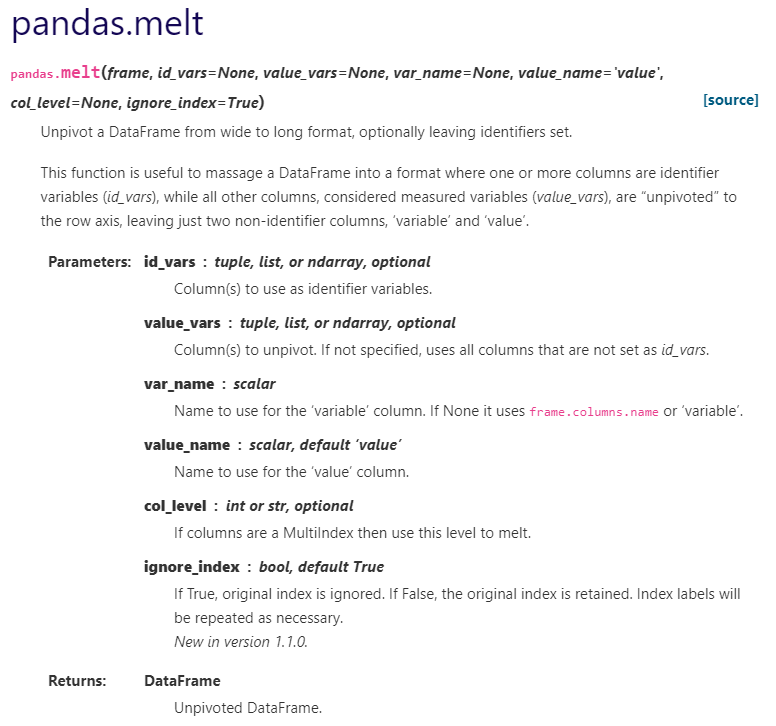

In [30]:
hours = df.copy()
hours

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
0,Evgeniya,0,0,4,4,4,5,3
1,Stephen,4,1,4,0,4,3,2
2,Ben,4,3,4,4,4,2,1
3,Aaron,4,5,0,4,4,1,7


In [31]:
hours.melt(
    id_vars = 'pizza_driver', 
    var_name = 'date', 
    value_name = 'daily_hours'
)

,pizza_driver,date,daily_hours
0,Evgeniya,4/19/2021,0
1,Stephen,4/19/2021,4
2,Ben,4/19/2021,4
3,Aaron,4/19/2021,4
4,Evgeniya,4/20/2021,0
5,Stephen,4/20/2021,1
6,Ben,4/20/2021,3
7,Aaron,4/20/2021,5
8,Evgeniya,4/21/2021,4
9,Stephen,4/21/2021,4


By stacking data we build **tidy data** table which is in general better to work with and manupilate.
**Tidy data** is a specific structure of data that makes analysis easier. A dataset is tidy when:
 1. Each variable forms a column
 2. Each observation forms a row
 3. Each type of observational unit forms a table


## Almost there! Now we want to sort the values by pizza_driver to look at each person's weekly schedule in a list.

In [32]:
stacked_hours = hours.melt(id_vars = 'pizza_driver', var_name = 'date', value_name = 'daily_hours')

stacked_hours.sort_values('pizza_driver')

,pizza_driver,date,daily_hours
27,Aaron,4/25/2021,7
3,Aaron,4/19/2021,4
23,Aaron,4/24/2021,1
7,Aaron,4/20/2021,5
19,Aaron,4/23/2021,4
11,Aaron,4/21/2021,0
15,Aaron,4/22/2021,4
2,Ben,4/19/2021,4
22,Ben,4/24/2021,2
6,Ben,4/20/2021,3


## To make this even easier to read, let's sort by two values: driver AND date by passing in a list of columns to sort



In [33]:
columns_to_sore = ['pizza_driver', 'date']

stacked_hours = stacked_hours.sort_values(columns_to_sore)
stacked_hours

,pizza_driver,date,daily_hours
3,Aaron,4/19/2021,4
7,Aaron,4/20/2021,5
11,Aaron,4/21/2021,0
15,Aaron,4/22/2021,4
19,Aaron,4/23/2021,4
23,Aaron,4/24/2021,1
27,Aaron,4/25/2021,7
2,Ben,4/19/2021,4
6,Ben,4/20/2021,3
10,Ben,4/21/2021,4


### Alternative method by putting the names of the columns as a list direction into the function

In [34]:
#total code

hours = df.copy()
stacked_hours = hours.melt(id_vars = 'pizza_driver', var_name = 'date', value_name = 'daily_hours')
stacked_hours = stacked_hours.sort_values(['pizza_driver', 'date'])

In [35]:
# display both dataframe

display(hours)
display(stacked_hours)

,pizza_driver,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021
0,Evgeniya,0,0,4,4,4,5,3
1,Stephen,4,1,4,0,4,3,2
2,Ben,4,3,4,4,4,2,1
3,Aaron,4,5,0,4,4,1,7


,pizza_driver,date,daily_hours
3,Aaron,4/19/2021,4
7,Aaron,4/20/2021,5
11,Aaron,4/21/2021,0
15,Aaron,4/22/2021,4
19,Aaron,4/23/2021,4
23,Aaron,4/24/2021,1
27,Aaron,4/25/2021,7
2,Ben,4/19/2021,4
6,Ben,4/20/2021,3
10,Ben,4/21/2021,4


### What if we want to know the days of the week for each of these dates?...

## The DateTime Module
The DateTime module gives you the ability to manipulate dates and times using Python.  The <b>datetime</b> module has many uses to include finding the days of the week associated with each date, add and subtract days from any date, and convert from various time formats, etc. 

Here is a link to the documentation: https://docs.python.org/3/library/datetime.html#

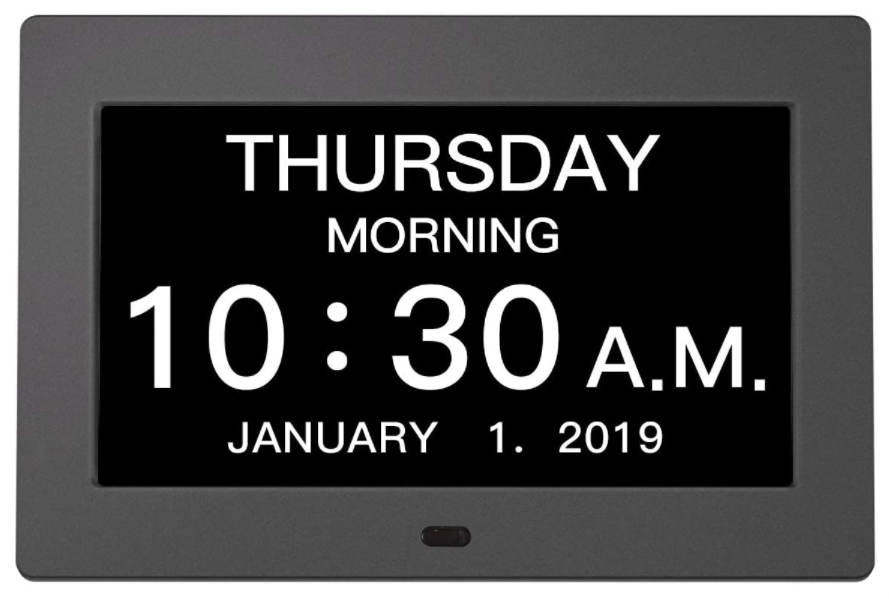

## You need to import datetime to use the datetime module

In [36]:
import datetime as dt

### Extract the Month, Day, Year, 'Day of Week' and 'Week of Year'

In [37]:
hours = df.copy()
stacked_hours = hours.melt(id_vars = 'pizza_driver', var_name = 'date', value_name = 'daily_hours')
stacked_hours = stacked_hours.sort_values(['pizza_driver', 'date'])

In [38]:
display(stacked_hours.head())
display(stacked_hours.info())

,pizza_driver,date,daily_hours
3,Aaron,4/19/2021,4
7,Aaron,4/20/2021,5
11,Aaron,4/21/2021,0
15,Aaron,4/22/2021,4
19,Aaron,4/23/2021,4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 3 to 25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pizza_driver  28 non-null     object
 1   date          28 non-null     object
 2   daily_hours   28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 896.0+ bytes


None

### The date is an string object, so we first need to convert it to a 'Datetime' Object. NOTE: This is very common!  Easiest way is to use the .to_datetime() method

In [39]:
# method 1
stacked_hours['date'] =  pd.to_datetime(stacked_hours['date'], infer_datetime_format=True)


# method 2
stacked_hours['date'] = stacked_hours['date'].astype('datetime64[ns]')

# method 3
stacked_hours['date'] = stacked_hours['date'].apply(lambda x: pd.Timestamp(x))

stacked_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 3 to 25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pizza_driver  28 non-null     object        
 1   date          28 non-null     datetime64[ns]
 2   daily_hours   28 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 896.0+ bytes


### Use datetime module to extract the day name and month name.

In [40]:
stacked_hours['day_name']     = stacked_hours['date'].dt.day_name()   # day name
stacked_hours['month_name']   = stacked_hours['date'].dt.month_name() # month name

In [41]:
stacked_hours.head(10)

,pizza_driver,date,daily_hours,day_name,month_name
3,Aaron,2021-04-19,4,Monday,April
7,Aaron,2021-04-20,5,Tuesday,April
11,Aaron,2021-04-21,0,Wednesday,April
15,Aaron,2021-04-22,4,Thursday,April
19,Aaron,2021-04-23,4,Friday,April
23,Aaron,2021-04-24,1,Saturday,April
27,Aaron,2021-04-25,7,Sunday,April
2,Ben,2021-04-19,4,Monday,April
6,Ben,2021-04-20,3,Tuesday,April
10,Ben,2021-04-21,4,Wednesday,April


### Use DateTime module to extract additional information from dates.

In [42]:
stacked_hours['month_number'] = stacked_hours['date'].dt.month        # number month
stacked_hours['day of week']  = stacked_hours['date'].dt.dayofweek    # day of week
stacked_hours['day_of_month'] = stacked_hours['date'].dt.day          # day number
stacked_hours['year_number']  = stacked_hours['date'].dt.year         # year number
stacked_hours['week_number']  = stacked_hours['date'].dt.week         # week number


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [43]:
stacked_hours

,pizza_driver,date,daily_hours,day_name,month_name,month_number,day of week,day_of_month,year_number,week_number
3,Aaron,2021-04-19,4,Monday,April,4,0,19,2021,16
7,Aaron,2021-04-20,5,Tuesday,April,4,1,20,2021,16
11,Aaron,2021-04-21,0,Wednesday,April,4,2,21,2021,16
15,Aaron,2021-04-22,4,Thursday,April,4,3,22,2021,16
19,Aaron,2021-04-23,4,Friday,April,4,4,23,2021,16
23,Aaron,2021-04-24,1,Saturday,April,4,5,24,2021,16
27,Aaron,2021-04-25,7,Sunday,April,4,6,25,2021,16
2,Ben,2021-04-19,4,Monday,April,4,0,19,2021,16
6,Ben,2021-04-20,3,Tuesday,April,4,1,20,2021,16
10,Ben,2021-04-21,4,Wednesday,April,4,2,21,2021,16


### `groupby()`

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [44]:
stacked_hours?

In [45]:
hours_by_day = stacked_hours[['day_name','daily_hours']].groupby(by = ['day_name']).sum()
hours_by_day

,daily_hours
day_name,
Friday,16
Monday,12
Saturday,11
Sunday,13
Thursday,12
Tuesday,9
Wednesday,12


### `groupby()` operation with `agg()`

In [46]:
#same operation but different implementation:
hours_by_day = stacked_hours.groupby('day_name')[['daily_hours']].agg('sum')
hours_by_day

,daily_hours
day_name,
Friday,16
Monday,12
Saturday,11
Sunday,13
Thursday,12
Tuesday,9
Wednesday,12


### Redo a `groupby()` operation with `pivot_table()`

In [47]:
stacked_hours.pivot_table(index=['day_name'], 
                         values=['daily_hours'], 
                         aggfunc='sum')

,daily_hours
day_name,
Friday,16
Monday,12
Saturday,11
Sunday,13
Thursday,12
Tuesday,9
Wednesday,12


### reset_index()

In [48]:
hours_by_day = hours_by_day.reset_index('day_name')
hours_by_day

,day_name,daily_hours
0,Friday,16
1,Monday,12
2,Saturday,11
3,Sunday,13
4,Thursday,12
5,Tuesday,9
6,Wednesday,12


### pd.Categorical() 

Categoricals can only take on only a limited, and usually fixed, number of possible values (categories). In contrast to statistical categorical variables, a Categorical might have an order, but numerical operations (additions, divisions, …) are not possible.

SOURCE: https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html

In [49]:
# this function establishes an order of importance. 

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


pd.Categorical(hours_by_day['day_name'], categories = order, ordered=True)

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [50]:
#convert day_name columns to categorical type
hours_by_day['day_name_cat'] = pd.Categorical(hours_by_day['day_name'], categories = order, ordered=True)

hours_by_day

,day_name,daily_hours,day_name_cat
0,Friday,16,Friday
1,Monday,12,Monday
2,Saturday,11,Saturday
3,Sunday,13,Sunday
4,Thursday,12,Thursday
5,Tuesday,9,Tuesday
6,Wednesday,12,Wednesday


In [51]:
hours_by_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   day_name      7 non-null      object  
 1   daily_hours   7 non-null      int64   
 2   day_name_cat  7 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 603.0+ bytes


### sort_values()

In [52]:
# sort values of original day_name column
hours_by_day.sort_values('day_name')

,day_name,daily_hours,day_name_cat
0,Friday,16,Friday
1,Monday,12,Monday
2,Saturday,11,Saturday
3,Sunday,13,Sunday
4,Thursday,12,Thursday
5,Tuesday,9,Tuesday
6,Wednesday,12,Wednesday


In [53]:
# sort values of categorical day_name_cat column with order defined
hours_by_day.sort_values('day_name_cat')

,day_name,daily_hours,day_name_cat
1,Monday,12,Monday
5,Tuesday,9,Tuesday
6,Wednesday,12,Wednesday
4,Thursday,12,Thursday
0,Friday,16,Friday
2,Saturday,11,Saturday
3,Sunday,13,Sunday


### Plot the total hours all the drivers are available by day

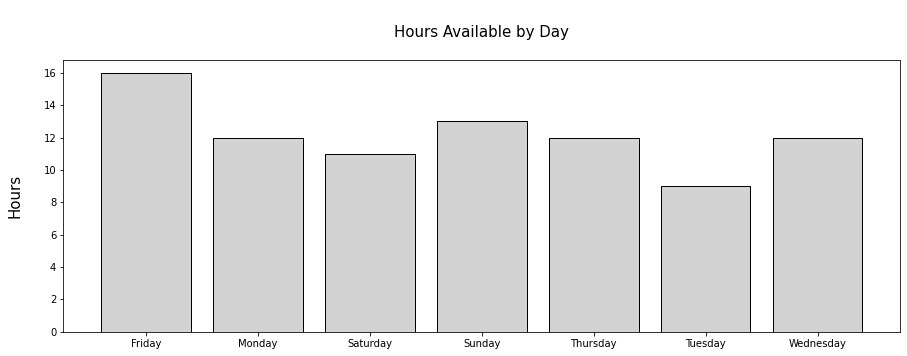

In [54]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize = (15, 5))
plt.bar(hours_by_day['day_name'], hours_by_day['daily_hours'], color = 'lightgrey', edgecolor = 'black')
plt.title('\nHours Available by Day\n', fontsize =15)
plt.ylabel('Hours\n', fontsize = 15)

plt.show()

## More on datetime methods

### `timedelta()`

Main documantation for pamdas.Timedelta() is here https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html

In [55]:
stacked_hours.head()

,pizza_driver,date,daily_hours,day_name,month_name,month_number,day of week,day_of_month,year_number,week_number
3,Aaron,2021-04-19,4,Monday,April,4,0,19,2021,16
7,Aaron,2021-04-20,5,Tuesday,April,4,1,20,2021,16
11,Aaron,2021-04-21,0,Wednesday,April,4,2,21,2021,16
15,Aaron,2021-04-22,4,Thursday,April,4,3,22,2021,16
19,Aaron,2021-04-23,4,Friday,April,4,4,23,2021,16


In [56]:
#need to adjust date, e.g. add one day
date_shift = pd.Timedelta(1, unit = 'day')
date_shift

Timedelta('1 days 00:00:00')

In [57]:
stacked_hours['new_date'] = stacked_hours['date'] + date_shift

stacked_hours[['pizza_driver','date','new_date']].head()

,pizza_driver,date,new_date
3,Aaron,2021-04-19,2021-04-20
7,Aaron,2021-04-20,2021-04-21
11,Aaron,2021-04-21,2021-04-22
15,Aaron,2021-04-22,2021-04-23
19,Aaron,2021-04-23,2021-04-24


### `strftime()`
Allow to convert date to specified format. See documentation at https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html

Find date formats here: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [58]:
stacked_hours['date_format'] = stacked_hours['date'].dt.strftime('%A %B %d, %Y')

stacked_hours[['pizza_driver', 'date', 'date_format']].head()

,pizza_driver,date,date_format
3,Aaron,2021-04-19,"Monday April 19, 2021"
7,Aaron,2021-04-20,"Tuesday April 20, 2021"
11,Aaron,2021-04-21,"Wednesday April 21, 2021"
15,Aaron,2021-04-22,"Thursday April 22, 2021"
19,Aaron,2021-04-23,"Friday April 23, 2021"


# Additional Resources on How to Work With DateTimes

ONLINE VERSION FOR FREE! https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

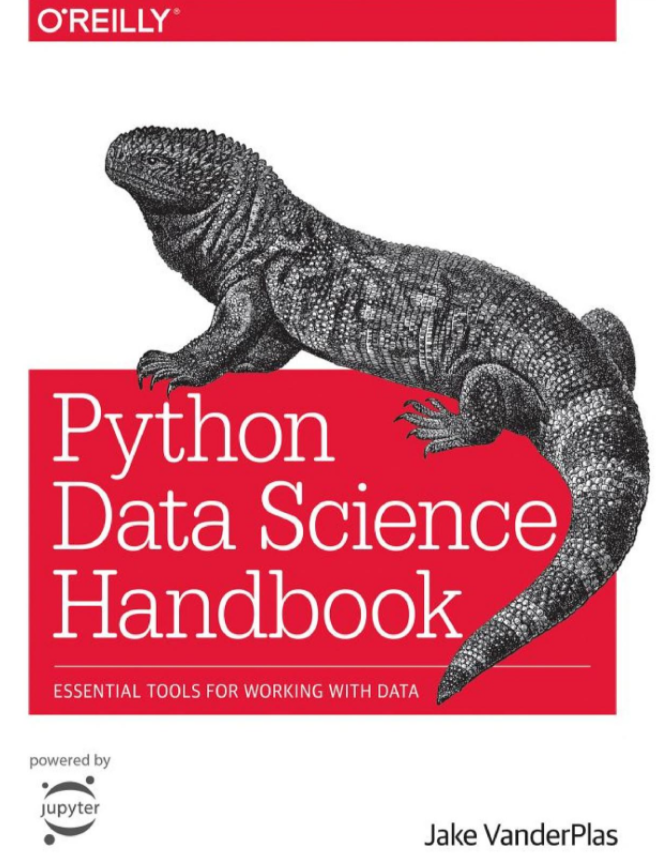